In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
house=pd.read_csv('/content/drive/MyDrive/house.csv')
house

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

In [12]:
house=pd.read_csv('house.csv')
house

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

In [13]:
house.shape

(4600, 18)

In [14]:
house.size

82800

In [15]:
house.ndim

2

In [16]:
house.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [18]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [19]:
house.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [20]:
house.tail()

date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501 N 143rd St    Seattle   
4596              0      1983          2009   14855 SE 10th Pl   Bellevue   
4597              0      2009             0   759 Ilwaco Pl NE     Renton   
4598           1020      1974             0  5148 S Creston St    Seattle   
4599              0      1990             0  18717 SE 258th St  Covington   

      statezip country  
4595  WA 98133     USA  
4596  WA 98007     USA  
4597  WA 98059     USA  
4598  WA 98178     USA  
4599  WA 98042     USA

<Axes: xlabel='bedrooms', ylabel='price'>

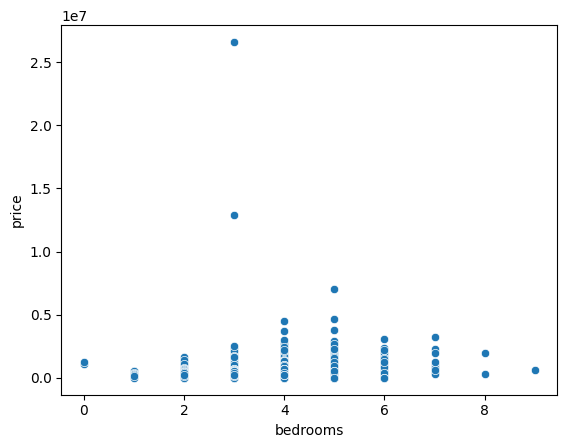

In [21]:
sns.scatterplot(x=house['bedrooms'],y=house['price'])

<Axes: >

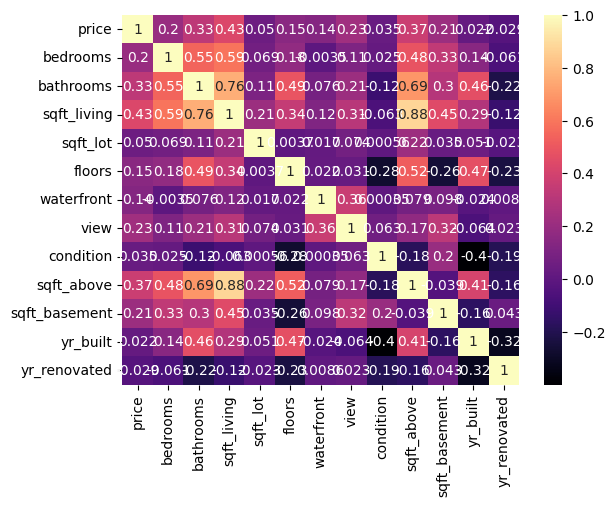

In [22]:
sns.heatmap(house.corr(numeric_only=True),annot=True,cmap='magma')

<Axes: xlabel='bedrooms'>

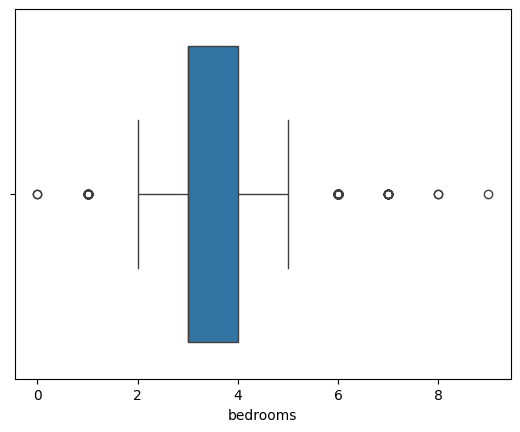

In [23]:
sns.boxplot(x=house['bedrooms'])

In [26]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [30]:
x=house[['sqft_living']]
y=house['price']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
prediction=model.predict(x_test)
prediction

array([ 364098.33163107,  508399.10707922,  759589.34582231,
        561843.83872669,  433576.48277277,  727522.50683383,
        540465.9460677 ,  532449.23632058,  527104.76315584,
        537793.70948533,  783639.47506367,  227814.26593003,
        834411.97012876,  535121.47290296,  398837.40720192,
        756917.10923994,  692783.43126298,  690111.19468061,
        882512.22861148,  954662.61633556,  724850.27025146,
        703472.37759247,  604599.62404466,  511071.3436616 ,
        195747.42694155,  182386.24402969,  674077.77518637,
        818378.55063452,  332031.49264259,  652699.88252738,
       1633410.70825837,  299964.65365411, 1221886.27457289,
        588566.20455042,  273242.28783038,  543138.18265008,
        871823.28228199,  962679.32608268,  294620.18048936,
        585893.96796805,  422887.53644328,  374787.27796056,
        516415.81682634,  462971.08517888,  310653.5999836 ,
        324014.78289547,  487021.21442024,  543138.18265008,
        818378.55063452,

In [36]:
c=model.intercept_
c

np.float64(-26048.2093954297)

In [41]:
m=model.coef_
m

array([267.22365824])

In [42]:
x=house[['sqft_living','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
y=house['price']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [46]:
prediction=model.predict(x_test)
prediction

array([ 304863.38578082,  326517.06991514, 1071762.53630093,
        546241.40097358,  379799.98321095,  605792.93622742,
        481263.57120655,  418905.11058141,  509341.50791924,
        530852.97588253,  682958.97641208,  414525.36130083,
        836974.40259892,  416500.85730824,  367263.43388234,
        702908.51672173,  677878.69067804,  515539.32998551,
       1019380.63891378,  861119.7949065 , 1364866.21814678,
        637439.70016764,  634739.56666337,  470424.21250267,
        162037.15383063,  232831.37648264,  669951.05071598,
        884080.66694985,  263027.22577223,  974954.64229473,
       1883342.16391266,  481510.29664876, 1275554.65253649,
        430994.93178866,  180366.40705434,  339240.17357423,
        792335.74094006, 1011053.14613361,  238036.20927691,
        543438.66040784,  423414.50597298,  243429.92107982,
        390151.30073941,  361322.67375664,  320343.34636032,
        317865.29287661,  469559.60646628,  573249.20158976,
        828966.75691593,

In [47]:
c=model.intercept_
c

np.float64(4925638.0661930395)

In [58]:
m=model.coef_
m

array([ 1.11629907e+02, -6.44974616e+04,  3.65204407e+04,  1.11629907e+02,
       -5.14414161e-01,  6.98247401e+04,  3.82459666e+05,  4.47558418e+04,
        2.93355394e+04,  5.96508481e+01,  5.19790588e+01, -2.56916353e+03,
        8.25991734e+00])

In [59]:
newdata=[[4,2,1600,2000,2,1,3,1,600,1000,2005,2010]]

In [2]:
predict_new= model.predict(newdata)

print("the predicted price",predict_new)

NameError: name 'model' is not defined